<a href="https://colab.research.google.com/github/mountechsolutions/hand-written-character-recognition/blob/master/mnist_logistic_regression%5Bposhan%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
print(mnist.data.shape)

(70000, 784)


In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
     mnist.data, mnist.target, test_size=0.3, random_state=0
)

In [ ]:
print(train_img.shape)

(49000, 784)


In [ ]:
print(train_lbl.shape)

(49000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

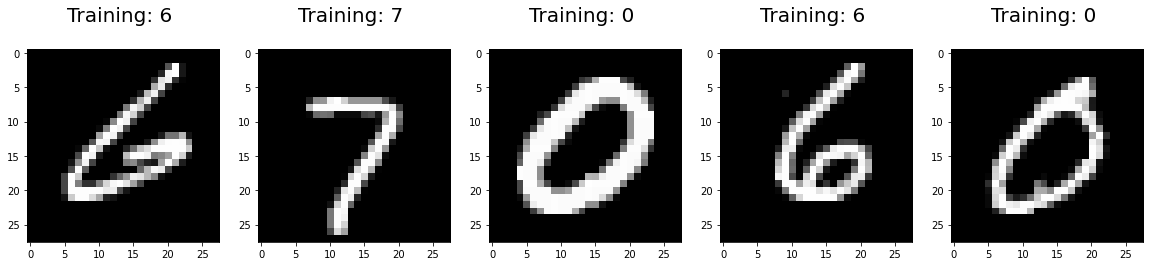

In [ ]:
plt.figure(figsize= (20,4))
for index, (images, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(images, (28,28)), cmap = plt.cm.gray)
  plt.title('Training: %s \n' % label, fontsize = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression( solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '7', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [ ]:
predictions = logisticRegr.predict(test_img)

In [ ]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9186666666666666


In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label != predict:
    misclassifiedIndexes.append(index)
  index = index + 1


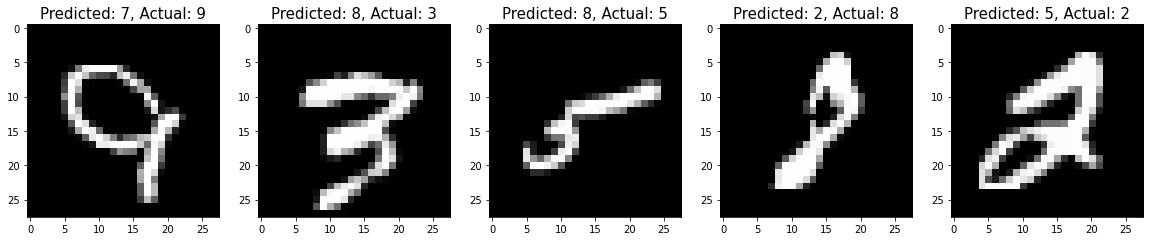

In [ ]:

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [ ]:
index2 = 0
correctclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
  if label == predict:
    correctclassifiedIndexes.append(index2)
  index2 = index2 + 1

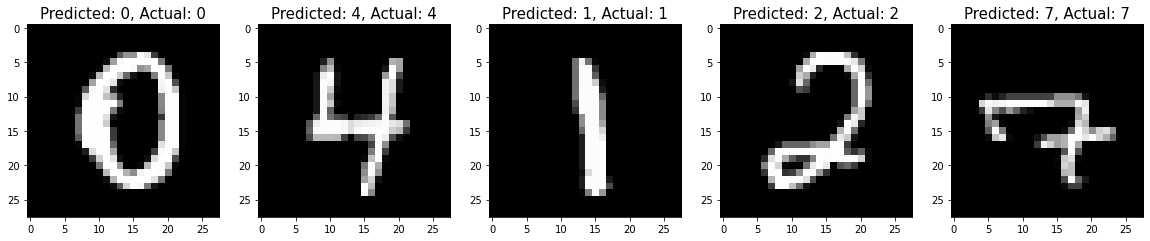

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(correctclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [28]:
import seaborn as sns
from sklearn import metrics

In [29]:
confM = metrics.confusion_matrix(test_lbl, predictions)

In [30]:
print(confM)

[[2020    0    4    2    3   17   18    1    8    4]
 [   0 2332   10    8    2    4    1    6   19    3]
 [  13   22 1894   30   31    4   22   19   74    6]
 [   7    8   50 1879    2   76    4   22   49   20]
 [   5    6   13    5 1864    3   24   12   13   59]
 [  21    7   14   67   24 1628   34   12   76   17]
 [  14    4   25    3   22   27 1934    3   13    0]
 [   3    9   27   10   23    2    0 2031    9   75]
 [   9   42   21   43   10   67   21    3 1802   24]
 [  10    7    8   23   77   13    1   64   15 1908]]


Text(0.5, 1.0, 'Accuracy Score: 0.9186666666666666')

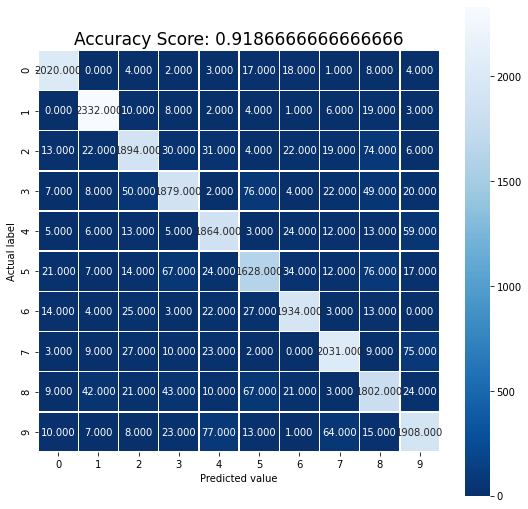

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(confM, annot=True, fmt= ".3f", linewidths= .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted value');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 17)